# Packages Installed

In [1]:
pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.10.0
bleach                       4.1.0
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  2.0
fonttools                    4.31.1
gast                         0.5.3
google-auth                  2.6.2
google-auth-oauthlib         0.4.6
google-pasta                 0.

# Importing Packages

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [20]:
import cv2

In [5]:
import os

In [6]:
import pandas as pd

In [7]:
from tensorflow import keras

In [8]:
from keras.models import Sequential

In [9]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [10]:
from keras.layers import Dense, Flatten, Dropout

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
from tqdm import tqdm

In [24]:
import random

In [14]:
from random import shuffle  

In [15]:
from zipfile import ZipFile

In [16]:
from PIL import Image

In [28]:
from tensorflow.keras.utils import to_categorical

In [38]:
from tensorflow.keras.optimizers import Adam

# Look Up into the DataSet

In [17]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('./HGRD/leapGestRecog/leapGestRecog/00/'):
    if not j.startswith('.'):  
                              
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [21]:
x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0 
for i in range(0, 10): 
    for j in os.listdir('./HGRD/leapGestRecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): 
            count = 0 
            for k in os.listdir('./HGRD/leapGestRecog/leapGestRecog/0' + str(i) + '/' + j + '/'):
                path = './HGRD/leapGestRecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

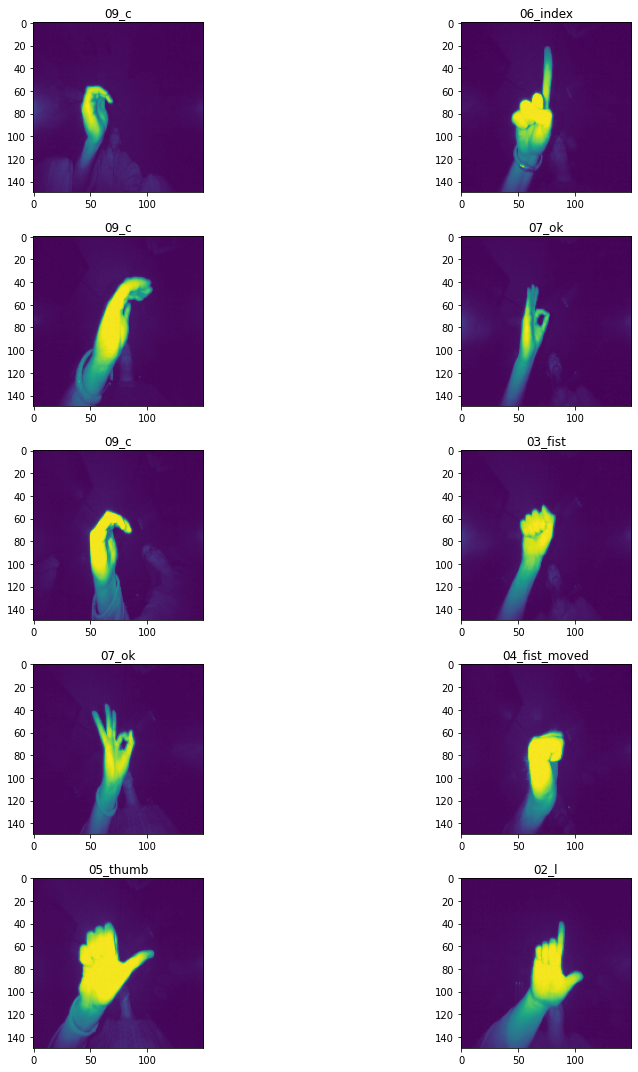

In [25]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverselookup[y_data[l,0]])
plt.tight_layout()

In [29]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=42)

# Convolution Network 

In [32]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

History = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 262s 524ms/step - loss: 0.1878 - accuracy: 0.9441 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 2/10
500/500 [==============================] - 328s 656ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 4.3518e-04 - val_accuracy: 1.0000
Epoch 3/10
500/500 [==============================] - 340s 680ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 4/10
500/500 [==============================] - 339s 679ms/step - loss: 6.2495e-05 - accuracy: 1.0000 - val_loss: 4.5881e-05 - val_accuracy: 1.0000
Epoch 5/10
500/500 [==============================] - 343s 686ms/step - loss: 9.9668e-06 - accuracy: 1.0000 - val_loss: 2.8159e-05 - val_accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 305s 611ms/step - loss: 5.5926e-06 - accuracy: 1.0000 - val_loss: 1.9852e-05 - val_accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 308s 616ms/step - loss: 3.6874e-06 - accur

In [48]:
model.save('handgesture_model.h5')

# Check Model Loss

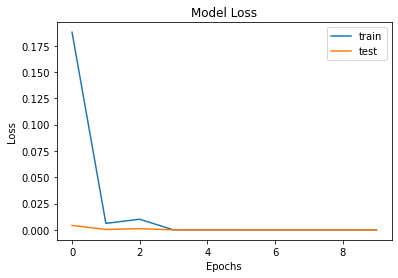

In [42]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Check Model Accuracy

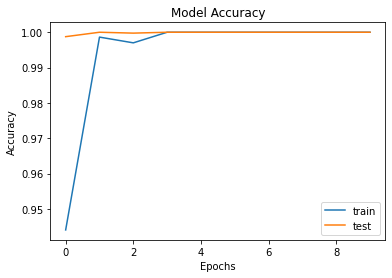

In [43]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [50]:
prediction = model.predict(x_test)

# Validate the Model 